In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [22]:
# 🌦️ Analyse Exploratoire des Données Météo (EDA)
# Ce notebook explore les données météorologiques collectées pour quatre grandes villes :
# Antananarivo, Paris, Tokyo et London.
# Données issues de l’API OpenWeather + historiques fusionnées.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

# 📥 Chargement des données
df = pd.read_csv("/home/ny-antsaniaina/airflow/dags/examen/data/merge_weather_clean.csv")
df['date'] = pd.to_datetime(df['date'], format='mixed')
df['day'] = df['date'].dt.date
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
df.head()


,date,jour,mois,annee,ville,temp,is_rainy,day,month,year
0,2020-07-05,5,7,2020,Antananarivo,14.0,0,2020-07-05,7,2020
1,2020-07-06,6,7,2020,Antananarivo,14.8,0,2020-07-06,7,2020
2,2020-07-07,7,7,2020,Antananarivo,15.7,0,2020-07-07,7,2020
3,2020-07-08,8,7,2020,Antananarivo,16.0,0,2020-07-08,7,2020
4,2020-07-09,9,7,2020,Antananarivo,14.2,0,2020-07-09,7,2020


In [23]:
# 📊 Statistiques agrégées par ville
summary = df.groupby('ville').agg(
    temp_moyenne=('temp', 'mean'),
    temp_min=('temp', 'min'),
    temp_max=('temp', 'max'),
    ecart_type=('temp', 'std'),
    jours_pluvieux=('is_rainy', 'sum')
).reset_index()

summary['score_extreme'] = (
    (summary['temp_max'] - summary['temp_min']) +
    summary['ecart_type'] * 2 +
    summary['jours_pluvieux']
).round(2)

summary


,ville,temp_moyenne,temp_min,temp_max,ecart_type,jours_pluvieux,score_extreme
0,Antananarivo,18.390512,11.4,24.1,2.655827,1037,1055.01
1,London,11.682629,-5.0,29.2,5.674309,1127,1172.55
2,Paris,12.767327,-3.2,32.1,6.509956,1091,1139.32
3,Tokyo,15.960410,-1.9,32.2,8.493388,969,1020.09


/tmp/ipykernel_13137/2274458746.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=summary, x='ville', y='temp_moyenne', palette='coolwarm')


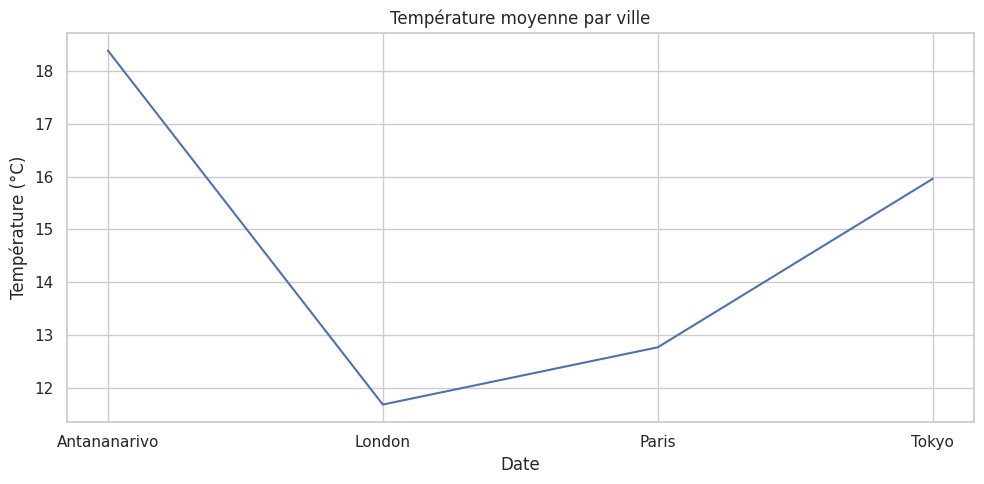

In [24]:
# 📈 Température moyenne par ville
plt.figure(figsize=(10,5))
sns.lineplot(data=summary, x='ville', y='temp_moyenne', palette='coolwarm')
plt.title('Température moyenne par ville')
plt.xlabel("Date")
plt.ylabel('Température (°C)')
plt.tight_layout()
plt.show()


/tmp/ipykernel_13137/3123101911.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=summary, x='ville', y='jours_pluvieux', palette='Blues')


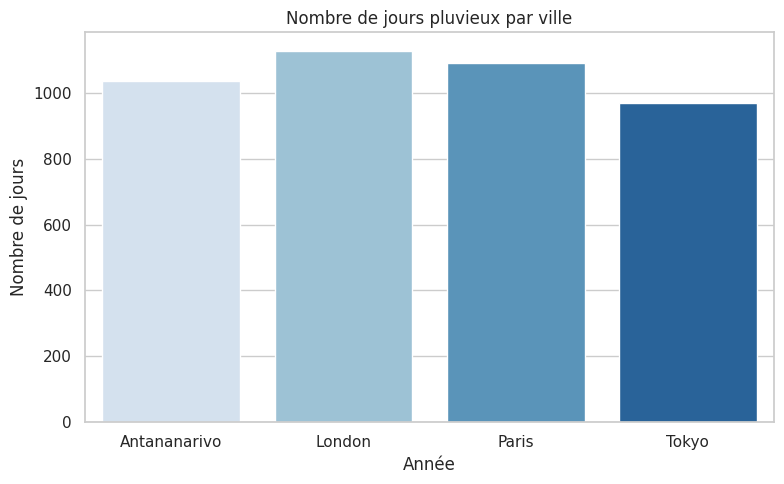

In [25]:
# ☔ Nombre de jours pluvieux par ville
plt.figure(figsize=(8,5))
sns.barplot(data=summary, x='ville', y='jours_pluvieux', palette='Blues')
plt.title('Nombre de jours pluvieux par ville')
plt.xlabel("Année")
plt.ylabel('Nombre de jours')
plt.tight_layout()
plt.show()


classement des villes par score d’extrême météo

In [26]:
ville_extreme = summary.sort_values(by='score_extreme', ascending=False).iloc[0]
ville_stable = summary.sort_values(by='score_extreme', ascending=True).iloc[0]

print("Classement des villes les plus extrêmes :")
print(summary[["ville", "score_extreme"]])


Classement des villes les plus extrêmes :
          ville  score_extreme
0  Antananarivo        1055.01
1        London        1172.55
2         Paris        1139.32
3         Tokyo        1020.09


Un nuage de points Température vs Pluie

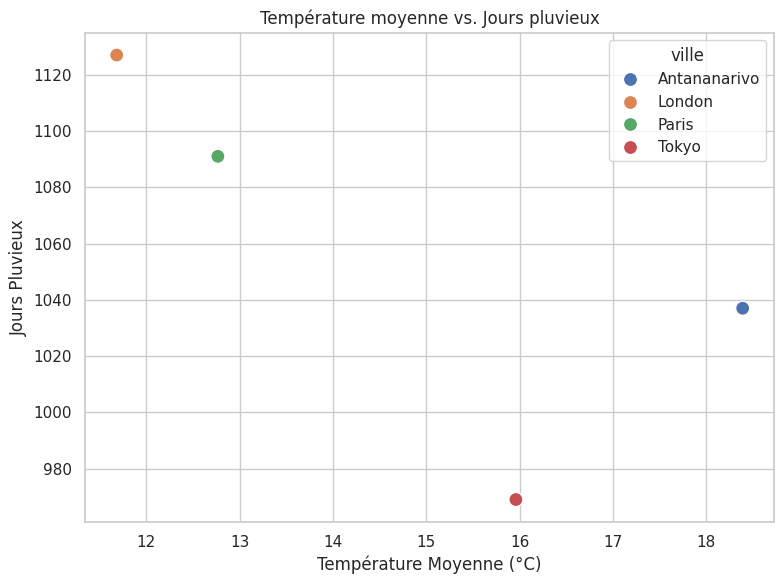

In [27]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=summary, x='temp_moyenne', y='jours_pluvieux', hue='ville', s=100)
plt.title("Température moyenne vs. Jours pluvieux")
plt.xlabel("Température Moyenne (°C)")
plt.ylabel("Jours Pluvieux")
plt.tight_layout()
plt.show()


In [28]:
# 🔍 Conclusion
# Ville la plus extrême :
ville_extreme = summary.sort_values(by='score_extreme', ascending=False).iloc[0]
print(f"La ville la plus extrême est : {ville_extreme['ville']} avec un score de {ville_extreme['score_extreme']}")

# Ville la plus stable :
ville_stable = summary.sort_values(by='score_extreme').iloc[0]
print(f"La ville la plus stable est : {ville_stable['ville']} avec un score de {ville_stable['score_extreme']}")


La ville la plus extrême est : London avec un score de 1172.55
La ville la plus stable est : Tokyo avec un score de 1020.09
